<a href="https://colab.research.google.com/github/abhimithra02/Decision-Tree-diabetes/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Hello")

Hello


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os 
os.getcwd()         

'/content'

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

from IPython.display import Image
from IPython.core.display import HTML   


In [ ]:
col_names= ['Pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label']  

In [ ]:
diabetes = pd.read_csv("/content/drive/My Drive/diabetes_data.csv",names = col_names)
diabetes.head()

,Pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,BMI,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [ ]:
diabetes.describe()   

,Pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,769,769,769,769,769,769,769,769,769
unique,18,137,48,52,187,249,518,53,3
top,1,99,70,0,0,32,0.258,22,0
freq,135,17,57,227,374,13,6,72,500


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


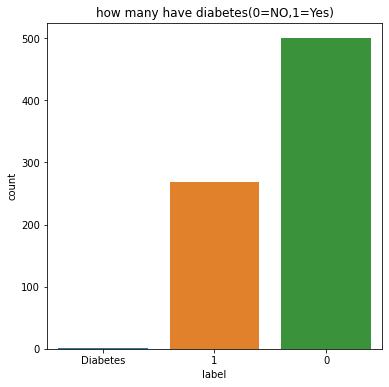

In [ ]:
plt.figure(figsize=(6,6))
plt.title('how many have diabetes(0=NO,1=Yes)')
locs,labels = plt.xticks()
sns.countplot(diabetes['label'])
plt.show();

In [ ]:
diabetes.isnull().sum()

Pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64

In [ ]:
diabetes['label'].value_counts(normalize = True)

0           0.650195
1           0.348505
Diabetes    0.001300
Name: label, dtype: float64

In [ ]:
corr=diabetes.corr()
sns.set(font_scale=1.15)
plt.figure(figsize=(8,8))
sns.heatmap(corr,vmax=.8,linewidths=0.01,square=True,annot=True,cmap='gist_heat',linecolor="black")
plt.title('Correlaton b/w feature')

ValueError: ignored

<Figure size 576x576 with 0 Axes>

In [ ]:
diabetes.plot(kind='box',subplots=True,layout=(3,3),sharex=False,sharey=False,figsize=(10,8))
plt.show()

TypeError: ignored

In [ ]:
feature_cols = ['Pregnant','insulin','bmi','age','glucose','bp','pedigree']
x=diabetes[feature_cols]
y=diabetes.label

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [ ]:
clf = DecisionTreeClassifier()
clf_model = clf.fit(x_train,y_train)
y_pred = clf_model.predict(x_test)
len(y_pred)

231

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("recall:",metrics.recall_score(y_test,y_pred))

Accuracy: 0.7229437229437229
recall: 0.6385542168674698


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


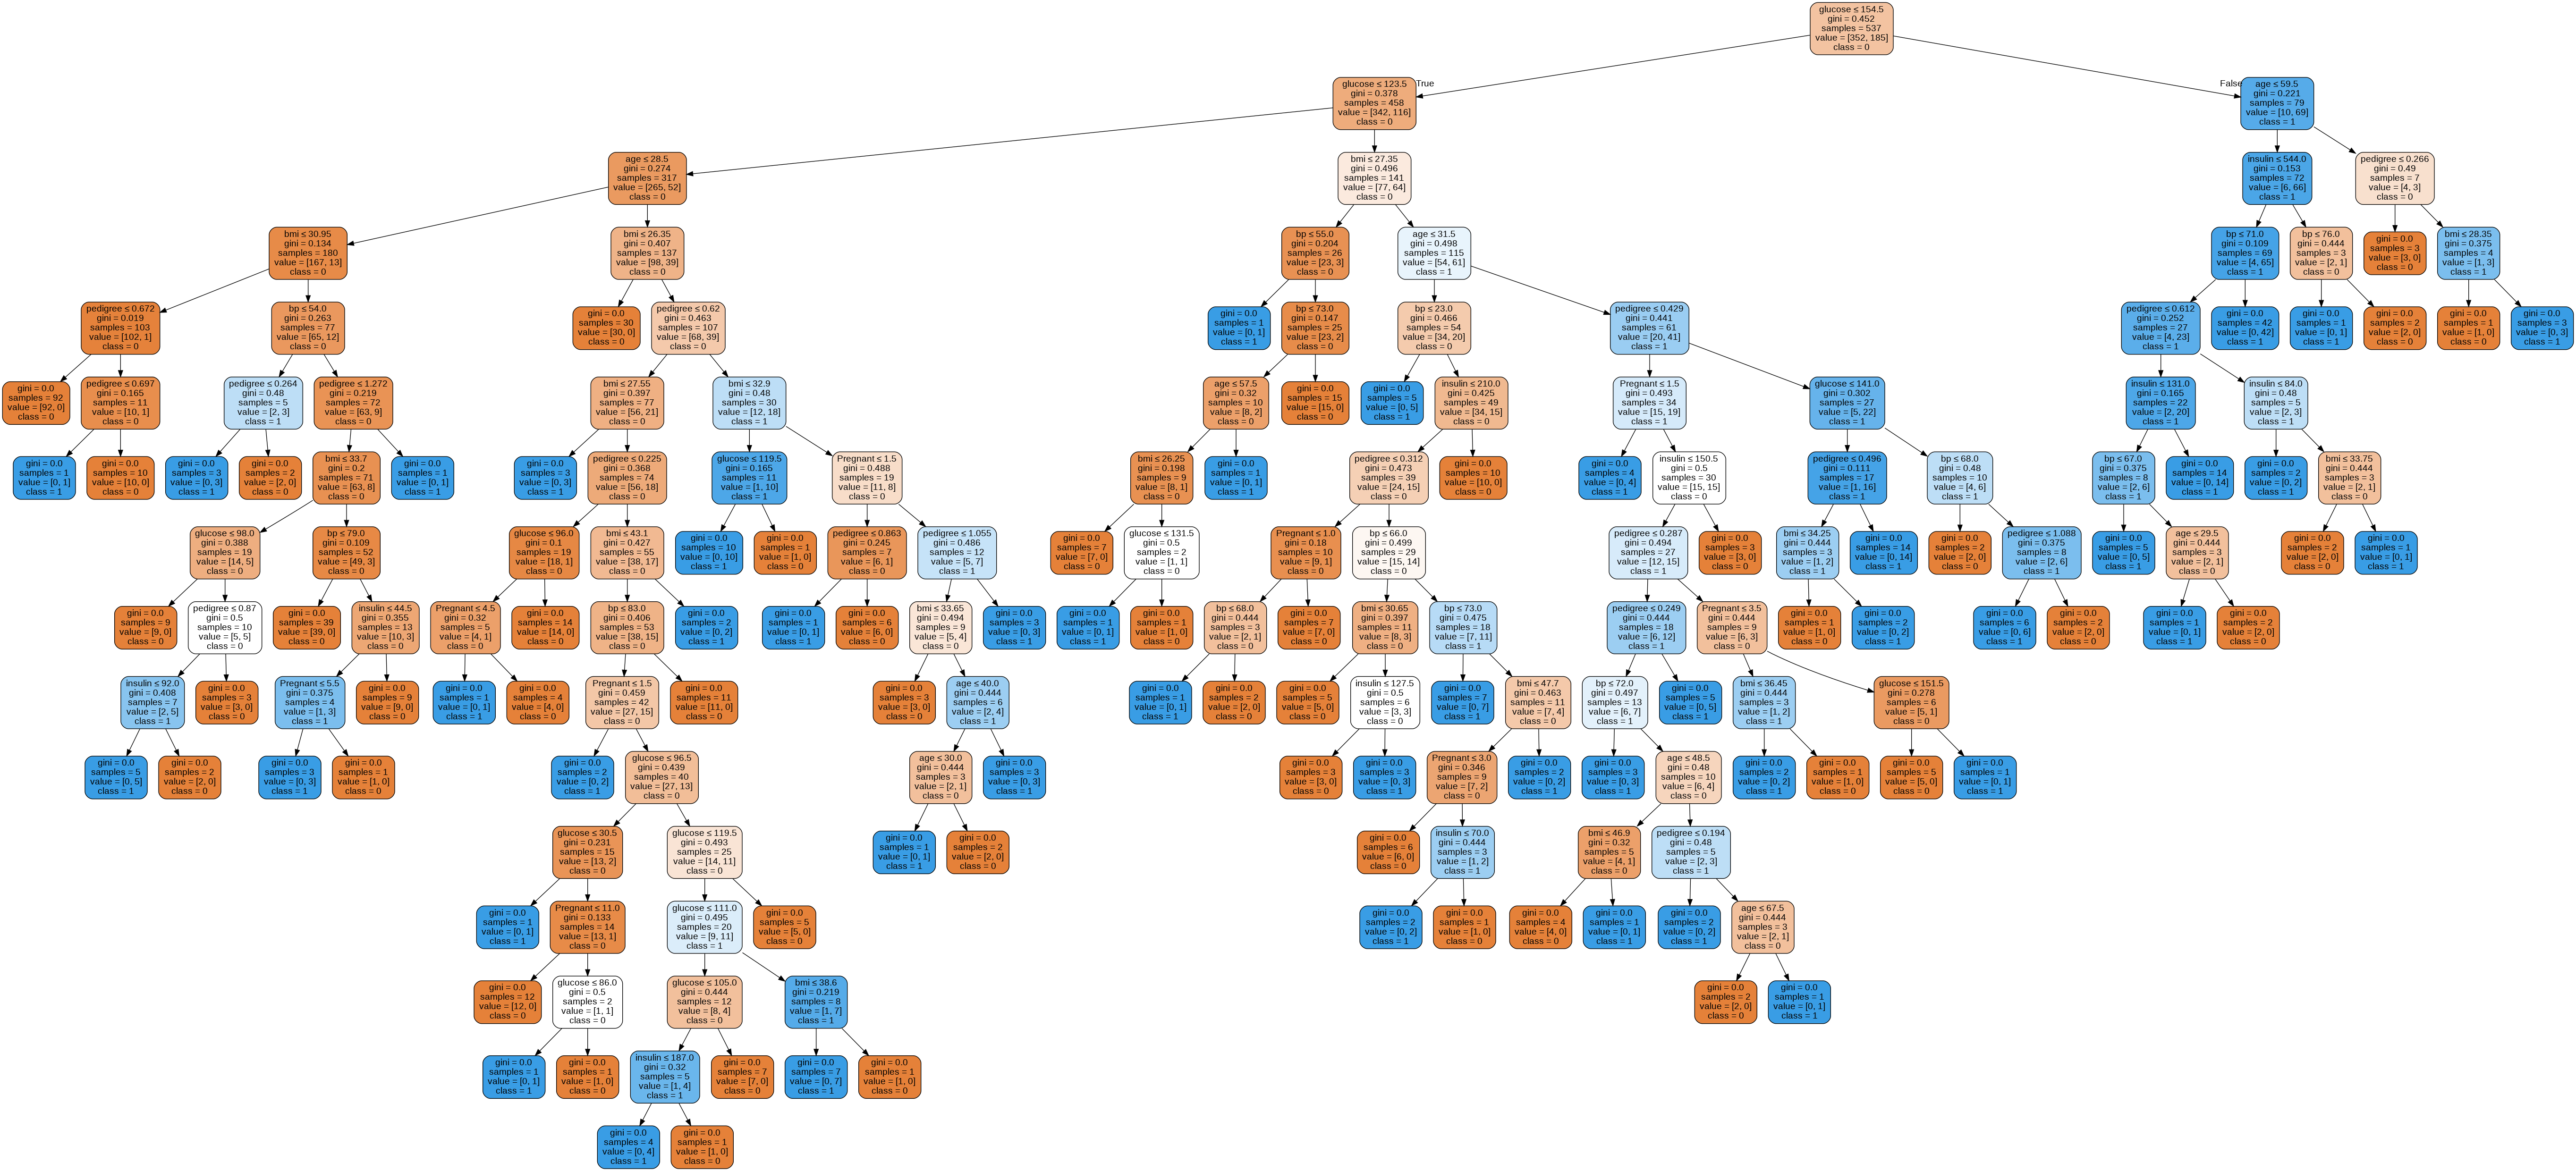

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(clf,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=feature_cols,class_names=['0','1'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [ ]:
?DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy",max_depth=3)
clf_model = clf.fit(x_train,y_train)
y_pred = clf_model.predict(x_test)
len(y_pred)

231